# Лабораторная работа №4

## Тема: Линейные модели, SVM и деревья решений.

## Выполнил: Фонин Максим Алексеевич ИУ5-61Б

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Датасет

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Кодирование категориальных признаков

In [7]:
import category_encoders as ce

In [8]:
bin_enc = ce.BinaryEncoder(drop_invariant=True)
df = bin_enc.fit_transform(df)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad_0,mainroad_1,guestroom_0,guestroom_1,basement_0,basement_1,hotwaterheating_0,hotwaterheating_1,airconditioning_0,airconditioning_1,parking,prefarea_0,prefarea_1,furnishingstatus_0,furnishingstatus_1
0,13300000,7420,4,2,3,0,1,0,1,0,1,0,1,0,1,2,0,1,0,1
1,12250000,8960,4,4,4,0,1,0,1,0,1,0,1,0,1,3,1,0,0,1
2,12250000,9960,3,2,2,0,1,0,1,1,0,0,1,1,0,2,0,1,1,0
3,12215000,7500,4,2,2,0,1,0,1,1,0,0,1,0,1,3,0,1,0,1
4,11410000,7420,4,1,2,0,1,1,0,1,0,0,1,0,1,2,1,0,0,1


## Разделение выборки на обучающую и тестовую

In [10]:
from sklearn.model_selection import train_test_split

y = df["price"]
X = df.drop(["price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.33, random_state=42)

## Линейная регрессия

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
sc = lr.score(X_train, y_train)
print('coefficient of determination:', sc)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination: 0.6866001290026065
intercept: 1896584.2469079555
slope: [ 2.50997691e+02  9.06770215e+04  1.12234550e+06  3.97963197e+05
 -2.05506713e+05  2.05506713e+05  1.58233802e+05 -1.58233802e+05
  2.41571670e+05 -2.41571670e+05  3.09416454e+05 -3.09416454e+05
 -3.42946304e+05  3.42946304e+05  2.91528990e+05 -2.61559429e+05
  2.61559429e+05 -3.94620325e+05 -2.82687906e+05]


In [12]:
y_lr = lr.predict(X_test)

## SVM

In [13]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

In [14]:
y_svm = regressor.predict(X_test)

## Дерево решений

In [15]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [16]:
y_dt = dt.predict(X_test)

## Оценка качества

In [17]:
# root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

lr_root_mean_sq_error = sqrt(mean_squared_error(y_test, y_lr))
svm_root_mean_sq_error = sqrt(mean_squared_error(y_test, y_svm))
dt_vm_root_mean_sq_error = sqrt(mean_squared_error(y_test, y_dt))

print("Линейная регрессия: ", lr_root_mean_sq_error)
print("SVM: ", svm_root_mean_sq_error)
print("Дерево решений: ", dt_vm_root_mean_sq_error)

Линейная регрессия:  1209843.8018674748
SVM:  2131940.401198257
Дерево решений:  1727294.4892063942


In [18]:
# median_absolute_error
from sklearn.metrics import median_absolute_error

print("Линейная регрессия: ", median_absolute_error(y_test, y_lr))
print("SVM: ", median_absolute_error(y_test, y_svm))
print("Дерево решений: ", median_absolute_error(y_test, y_dt))

Линейная регрессия:  636612.5332413153
SVM:  1221561.0074209515
Дерево решений:  910000.0


In [19]:
# r2_score
from sklearn.metrics import r2_score

print("Линейная регрессия: ", r2_score(y_test, y_lr))
print("SVM: ", r2_score(y_test, y_svm))
print("Дерево решений: ", r2_score(y_test, y_dt))

Линейная регрессия:  0.6584651734197499
SVM:  -0.060538666740025615
Дерево решений:  0.30383984487773263


## Важность признаков

In [20]:
list(zip(X_train.columns.values, dt.feature_importances_))

[('area', 0.4788395810698135),
 ('bedrooms', 0.05446420176161962),
 ('bathrooms', 0.15462525073271233),
 ('stories', 0.04007382010575032),
 ('mainroad_0', 0.0023233413118181894),
 ('mainroad_1', 0.0023545413188006442),
 ('guestroom_0', 0.0015408002820820668),
 ('guestroom_1', 0.010193747783910105),
 ('basement_0', 0.023057638497048945),
 ('basement_1', 0.022653849568080624),
 ('hotwaterheating_0', 0.0021746063194924355),
 ('hotwaterheating_1', 0.017631305894000478),
 ('airconditioning_0', 0.004768428620235844),
 ('airconditioning_1', 0.02847777990924507),
 ('parking', 0.08230653566461053),
 ('prefarea_0', 0.010956491080804051),
 ('prefarea_1', 0.018024888328944423),
 ('furnishingstatus_0', 0.011807463148628385),
 ('furnishingstatus_1', 0.03372572860240242)]

In [21]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    
    labels = [x for x,_ in sorted_list] # Названия признаков
    data = [x for _,x in sorted_list] # Важности признаков
    
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    
    return labels, data

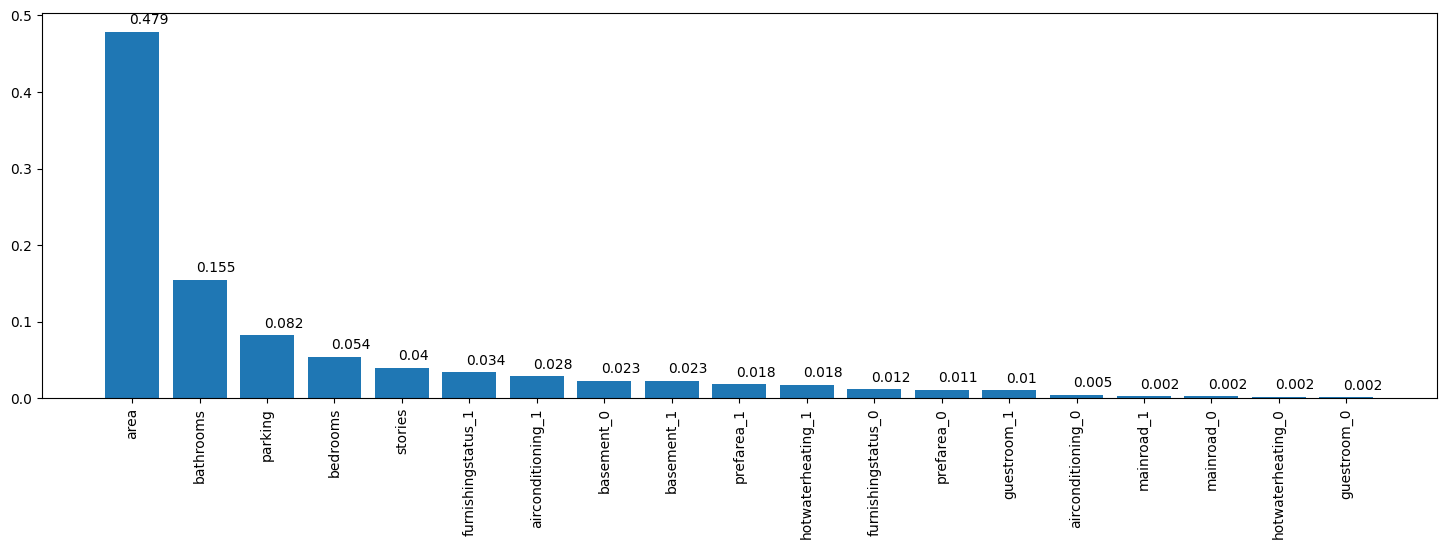

In [22]:
dt_fl, dt_fd = draw_feature_importances(dt, X_train)

## Правила дерева решений

In [23]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

[Text(0.5, 0.8333333333333334, 'x[0] <= 5992.5\nsquared_error = 3095726264862.02\nsamples = 365\nvalue = 4725939.151'),
 Text(0.25, 0.5, 'x[2] <= 1.5\nsquared_error = 1495090926519.238\nsamples = 253\nvalue = 4038378.854'),
 Text(0.125, 0.16666666666666666, 'squared_error = 983285272709.633\nsamples = 207\nvalue = 3794018.599'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2320346000000.0\nsamples = 46\nvalue = 5138000.0'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nsquared_error = 3231289485548.438\nsamples = 112\nvalue = 6279088.75'),
 Text(0.625, 0.16666666666666666, 'squared_error = 2230114104589.0\nsamples = 67\nvalue = 5576649.254'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2893467630843.656\nsamples = 45\nvalue = 7324943.111')]

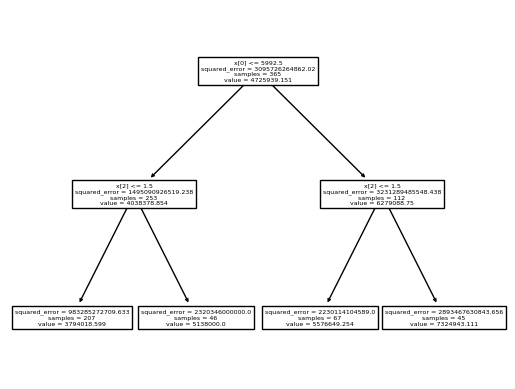

In [24]:
from sklearn import tree
dt_new = DecisionTreeRegressor(random_state=0, max_depth=2)
dt_new.fit(X_train, y_train)
tree.plot_tree(dt_new)